<a href="https://colab.research.google.com/github/mleticiamn/ClassificationProject-Jamming/blob/main/XGBoost_Jamming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt

import time

In [ ]:
def confusion_matrix(real, prediction):
  confusion_matrix = metrics.confusion_matrix(real, prediction)

  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                              display_labels=["1", "2", "3"])

  plt.figure(figsize=(6,6))
  cm_display.plot(cmap='gist_earth_r')
  plt.ylabel('True label', fontsize=15)
  plt.xlabel('Predicted label', fontsize=15)

  plt.gca().xaxis.set_tick_params(labelsize=18)
  plt.gca().yaxis.set_tick_params(labelsize=18)

  for text in cm_display.ax_.texts:
      text.set_fontsize(21)

  plt.show()

  return confusion_matrix

In [ ]:
dataset = pd.read_csv('RF_Jamming_Dataset_1.csv')
dataset = dataset.rename(columns={'Relative_Speed': 'RS'})
dataset = dataset.drop('Speed', axis=1)
dataset.head()

,Time,SNR,RSSI,PDR,RS,Scenario
0,0.1,22.35,-48.38,1.000000,25.313981,2
1,0.2,21.62,-49.14,0.999999,25.421060,2
2,0.3,20.85,-49.92,0.999997,25.327275,2
3,0.4,20.07,-50.69,0.999989,25.256933,2
4,0.5,19.30,-51.46,0.999958,25.038900,2


In [ ]:
# Dividing our dataset into features and targets
data_targets = dataset['Scenario']
data_features = dataset.drop('Scenario', axis=1)

In [ ]:
label_encoder = LabelEncoder()
data_targets = label_encoder.fit_transform(data_targets)

In [ ]:
# Split data
# 70% of our data used for testing
X_train, X_test, y_train, y_test = train_test_split(data_features, data_targets, test_size=0.7, random_state=2)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'learning_rate': [0.3, 0.5, 0.7],
    'subsample': [0.3, 0.5, 0.7, 0.9, 1],
    'objective': ['multi:softprob'],
    'num_class': [3],
    'gamma': [0, 0.1, 0.2, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 5, 10, 20, 50],
    'max_delta_step': [0, 0.1, 0.2, 0.5, 1, 2, 5, 10]
}

In [ ]:
'''
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
'''
#learning_rate=0.4, max_depth=5, n_estimators=100, num_class=3, objective="multi:softprob", subsample=0.9

'\ngrid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\nprint("Best parameters:", grid_search.best_params_)\n'

In [ ]:
'''
random_search = RandomizedSearchCV(xgb.XGBClassifier(), param_grid, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
'''
#subsample=0.9, objective="multi:softprob", num_class=3, n_estimators=100, min_child_weight=1, max_depth=5, max_delta_step=0, learning_rate=0.5, gamma=0.2

'\nrandom_search = RandomizedSearchCV(xgb.XGBClassifier(), param_grid, n_iter=100, cv=5, n_jobs=-1)\nrandom_search.fit(X_train, y_train)\n\nprint("Best parameters:", random_search.best_params_)\n'

In [ ]:
# Implementing our XGBoost classifier
clf = xgb.XGBClassifier(subsample=0.9, objective="multi:softprob", num_class=3, n_estimators=100, min_child_weight=1, max_depth=5, max_delta_step=2, learning_rate=0.5, gamma=0.2)
clf = clf.fit(X_train, y_train)
start_time = time.time()
preds = clf.predict(X_test)
inference_time = (time.time() - start_time)/len(X_test)

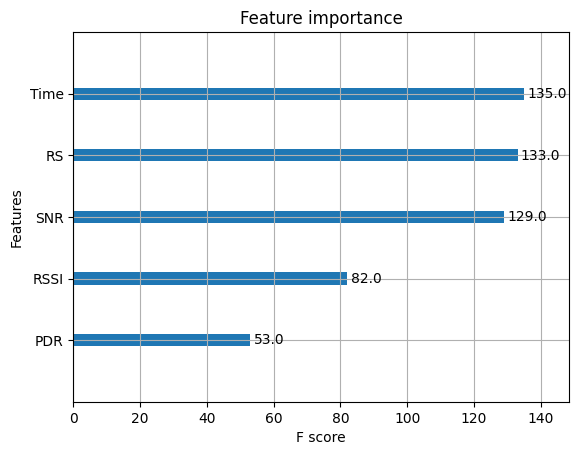

In [ ]:
plot_importance(clf)
plt.show()

<Figure size 600x600 with 0 Axes>

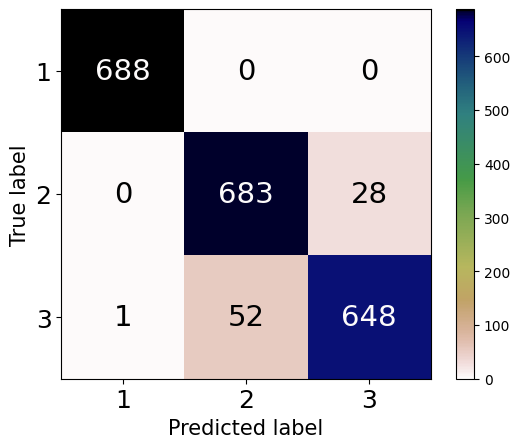

In [ ]:
cm = confusion_matrix(y_test, preds)

In [ ]:
accuracy_score(y_test, preds)

0.9614285714285714

In [ ]:
precision_score(y_test, preds,average="macro")

0.9621267345090692

In [ ]:
recall_score(y_test, preds, average="macro")

0.9616708566490976

In [ ]:
f1_score(y_test, preds, average="macro")

0.9617084065325326

In [ ]:
print(inference_time)

7.703077225458054e-06


In [ ]:
scores = cross_val_score(clf, data_features, data_targets, cv = 5)
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.8543333333333333


In [ ]:
n_iterations = 30

inference_times = []

for _ in range(n_iterations):
    start_time = time.time()
    preds = clf.predict(X_test)
    inference_time = time.time() - start_time
    inference_times.append(inference_time/len(X_test))

average_inference_time = np.mean(inference_times)

print(f"Tempo médio de inferência por previsão: {average_inference_time} segundos")

Tempo médio de inferência por previsão: 1.292999963911753e-05 segundos
